# Classification pt IIa - Logistic Regression and higher order decision boundaries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from math import *
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
import io

%matplotlib inline

plt.style.use('fivethirtyeight')

So far, we've been using logistic regression in terms of linear regression.  There is also a class in scikit-learn called `LogisticRegression`.  In order to fit it, it's using methods totally different than what we've used so far.  The method it uses involves defining a _cost function_, which you take the _derivative_ of and then perform some kind of _gradient-based optimization_.  Don't worry if that confuses you; we won't be dealing with any of that stuff in this term.

There is one extra thing that's going on under the hood though, and that's __regularization__.  We'll discuss that on Friday, as well as the notion of _parameters_ and _hyperparameters_.

You'll notice that this lab is `IIa`, because I need some time to consolodate all your collections of tweets into a single datafile.  We'll get to that as soon as I can!  For now, we have some practice thta will warm us up to it.

## 0: Differences in linear and logistic regression scikit-learn models

<div style="color:red"> Look through the documentation, or use the method we did when inspecting the `LinearRegression` model in scikit-learn, to determine the similarities and differences in possible keyword arguments between scikit-learn objects `LinearRegression` and `LogisticRegression`.  Tell me which ones are shared, what they are, and which are different, and what _they_ are.</div>

<div style="color:blue">In linear regression, the predictors are easily quantifiable (numbers), but in logistic regression the predictors are categorical data. 

Shared keyword arguments: fit_intercept (adds an intercept to the regression) and n_jobs (number of jobs to use for the computation)

Linear Regression keywords that Logistic Regression does not include: normalize (determine whether or not to normalize X before regression) and copy_X (makes copy of X)

Logistic Regression keywords that Linear Regression does not include: penalty (specifies the norm in the penalization), dual (use dual or primal formulation), intercept_scaling (scales intercept by intercept_scaling times), class_weight (weight associated with the classes), max_iter (maximum number of iterations for the solver to converge), random_state (seed of the random number generator to use), solver (algorithm to use in optimization problem), tol (tolerance of the stopping criteria), multi_class (ovr or multinomial), verbose, warm_start (whether or not to use the previous call to fit as initialization)</div>

## 1: Exercises in decision boundaries

<div style="color:red"> For each of the following datasets, train a logistic regression classifier which can classify these points with reasonable accuracy.  </div>

By reasonable here, that you should plot the decision boundary in scatterplot and make a convincing argument that you have accuractly fit the data.  Some thoughts on your process: you should probably

1. Make a scatter plot, discuss what features you probably need and why,
1. Perform whatever feature engineering you think you may need,
1. Train a `LogisticRegression` classifier,
1. Plot a new scatterplot including your decision boundary, and
1. Repeat these steps until you have a good fit.

The datasets are taken from `classification_exercises.csv` in the datasets folder on Canvas, and there are 5 datasets: `a`, `b`, `c`, `bonus`, and `otherbonus`.  The last two are bonuses, but they are not for extra points. They are simply challenge problems!

In [43]:
df = pd.read_csv('classification_exercises.csv', index_col = 0)
df.head()

,x_a1,x_a2,y_a,X_b1,X_b2,y_b,X_c1,X_c2,y_c,X_bonus1,X_bonus2,y_bonus,X_otherbonus1,X_otherbonus2,y_otherbonus
0,0.520931,-2.298578,0,0.875489,0.000982,1,0.712428,-0.543703,1,0.875489,0.000982,1,-0.336619,-0.511577,1
1,1.429695,-1.383873,0,-0.535927,-0.694028,1,0.100214,0.123386,1,-0.535927,-0.694028,1,0.511056,-0.667005,0
2,2.024782,0.125287,1,0.884205,-0.655863,0,0.968032,-0.695576,1,0.884205,-0.655863,0,0.654773,-0.418236,0
3,3.239727,0.363869,1,-0.096443,-0.934155,0,1.456700,-0.710133,1,-0.096443,-0.934155,0,-0.507675,-0.285552,1
4,1.085169,1.775098,1,-1.008296,0.188571,0,0.362917,0.763035,1,-1.008296,0.188571,0,0.063443,0.782734,0


<div style="color:blue"><h5> For each of the following plots, I first plot the predictors against one another and color them red and blue based on which category they are in. Then, I use LogisticRegression() to appropriately plot the decision boundaries for each dataset. Finally, I print out the accuracy score below each contour plot</h5></div>

### X_a1 vs X_a2

<div style="color:blue">This plot has a heavily overlapping portion, but the data still separates somewhere between this overlapping portion. It looks like we would use a line to separate it, but this regression would still have lots of errors</div>

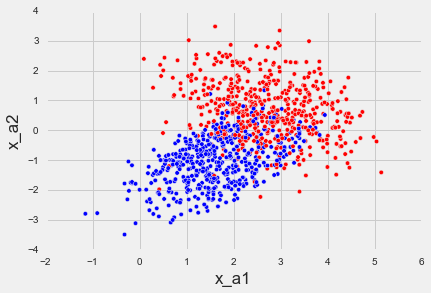

In [44]:
colors = {1:'r', 0:'b'}
plt.scatter(df.x_a1, df.x_a2, c=df.y_a.map(colors))
plt.xlabel("x_a1")
plt.ylabel("x_a2")
plt.show()

#Slice dataframe
X = df[['x_a1', 'x_a2']]
y=df['y_a']

#Fit the model
logreg = LogisticRegression()
model = logreg.fit(X,y)

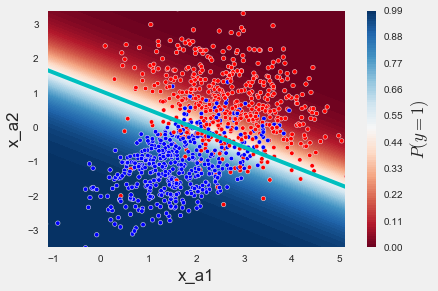

0.846


In [45]:
#Select data
X_data = df[['x_a1', 'x_a2']].values
x_axis_name = 'x_a1'
y_axis_name = 'x_a2'
#Create grid
GRANULARITY = 50
x1_min, x1_max, x2_min, x2_max = (df[x_axis_name].min(),df[x_axis_name].max(),df[y_axis_name].min(),df[y_axis_name].max())
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, GRANULARITY),np.linspace(x2_min, x2_max, GRANULARITY))
xx1_col = xx1.ravel()
xx2_col = xx2.ravel()
#Predict
X_columns = np.c_[xx1_col, xx2_col]
yy = model.predict_proba(X_columns).T[0]
yy = yy.reshape(xx1.shape)
#Plot figure
figure = plt.figure() 
ax = figure.add_subplot(1,1,1)
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
ax.set_xlabel('x_a1')
ax.set_ylabel('x_a2')
#Plot contours
ax.contour(xx1, xx2, yy, levels=[.5], colors=['c'])
contour = ax.contourf(xx1, xx2, yy, 100, cmap="RdBu",vmin=0, vmax=1)
ax_c = figure.colorbar(contour)
ax_c.set_label("$P(y = 1)$") 
#Plot scatter plot of original dataset
ax.scatter(df[x_axis_name],df[y_axis_name], c = df['y_a'].map(colors)) 
plt.show()
#Print accuracy score
print(logreg.score(X_data,y))

### X_b1 vs X_b2

<div style="color:blue">I used the formula for an ellipse to plot this decision boundary. Because the formula for an ellipse is in the form X^2 + Y^2, you would add two columns to your dataframe containing x_1^2 and x_2^2. I then fit the logistic regression of the slice of x_1, x_2, x_1^2, and x_2^2 versus y.</div>

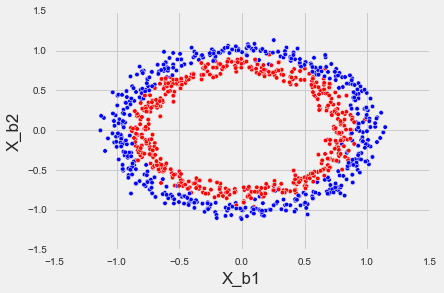

In [46]:
plt.scatter(df.X_b1, df.X_b2, c=df.y_b.map(colors))
plt.xlabel("X_b1")
plt.ylabel("X_b2")
plt.show()
#Add X_b1^2 and X_b2^2 to the df
df['X_b1^2'] = df['X_b1']**2
df['X_b2^2'] = df['X_b2']**2

#Slice the df
X =  df[['X_b1','X_b2', 'X_b1^2', 'X_b2^2']]
y = df['y_b']

#Fit the model
logreg = LogisticRegression()
model = logreg.fit(X,y)

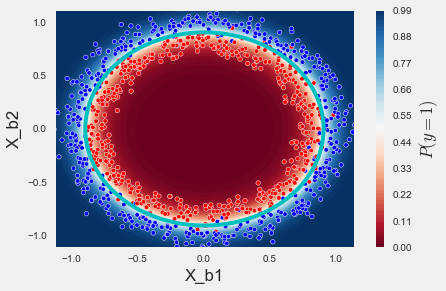

0.953


In [47]:
#Select data
X_data = df[['X_b1','X_b2', 'X_b1^2', 'X_b2^2']].values
x_axis_name = 'X_b1'
y_axis_name = 'X_b2'
#Create grid
GRANULARITY = 50
x1_min, x1_max, x2_min, x2_max = (df[x_axis_name].min(),df[x_axis_name].max(),df[y_axis_name].min(),df[y_axis_name].max())
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, GRANULARITY), np.linspace(x2_min, x2_max, GRANULARITY))
#Predict
xx1_col = xx1.ravel()
xx2_col = xx2.ravel()
yy = model.predict_proba(np.c_[xx1_col, xx2_col, xx1_col**2, xx2_col**2]).T[0]
yy = yy.reshape(xx1.shape)
#Plot figure
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
ax.set_xlabel('X_b1')
ax.set_ylabel('X_b2')
#Plot contours
ax.contour(xx1, xx2, yy, levels=[.5], colors=['c'])
contour = ax.contourf(xx1, xx2, yy, 100, cmap="RdBu",vmin=0, vmax=1)
ax_c = figure.colorbar(contour) 
ax_c.set_label("$P(y = 1)$")
#Plot scatter plot
ax.scatter(df[x_axis_name],df[y_axis_name], c = df['y_b'].map(colors)) 
plt.show()
#Print accuracy score
print(logreg.score(X_data,y))

### X_c1 vs X_c2

<div style="color:blue">Originally, I thought about using sine, but this didn't work so I tried fitting with a polynomial. To go about doing this, I added 4 columns: 2 with the first predictor value and the second predictor value squared, and 2 with the first predictor value and the second predictor value cubed. Then, using X as the slice of x_1, x_2, x_1^2, x_2^2, x_1^3, and x_2^3, I used LogisticRegression() to fit X vs y. </div>

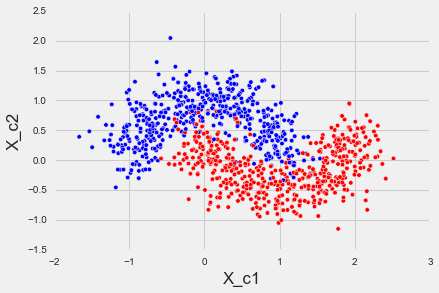

In [48]:
plt.scatter(df.X_c1, df.X_c2, c=df.y_c.map(colors))
plt.xlabel("X_c1")
plt.ylabel("X_c2")
plt.show()

#Add appropriate columns to df
df['X_c1^3'] = (df['X_c1'])**3
df['X_c2^3'] = (df['X_c2'])**3
df['X_c1^2'] = (df['X_c1'])**2
df['X_c2^2'] = (df['X_c2'])**2

#Slice the df
X = df[['X_c1', 'X_c2', 'X_c1^2','X_c2^2','X_c1^3', 'X_c2^3']]
y = df['y_c']

#Fit the data
logreg = LogisticRegression()
model = logreg.fit(X,y)

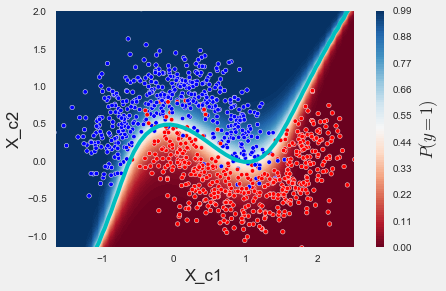

0.955


In [49]:
#Select data
X_data = df[['X_c1', 'X_c2', 'X_c1^2','X_c2^2','X_c1^3', 'X_c2^3']].values
x_axis_name = 'X_c1'
y_axis_name = 'X_c2'
#Create grid
GRANULARITY = 50
x1_min, x1_max, x2_min, x2_max = (df[x_axis_name].min(),df[x_axis_name].max(),df[y_axis_name].min(),df[y_axis_name].max())
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, GRANULARITY), np.linspace(x2_min, x2_max, GRANULARITY))
xx1_col = xx1.ravel()
xx2_col = xx2.ravel()
#Predict
yy = model.predict_proba(np.c_[xx1_col, xx2_col ,xx1_col**2, xx2_col**2,xx1_col**3, xx2_col**3]).T[0]
yy = yy.reshape(xx1.shape)
#Plot figure
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
ax.set_xlabel('X_c1')
ax.set_ylabel('X_c2')
#Plot contours
ax.contour(xx1, xx2, yy, levels=[.5], colors=['c'])
contour = ax.contourf(xx1, xx2, yy, 100, cmap="RdBu",vmin=0, vmax=1)
ax_c = figure.colorbar(contour) 
ax_c.set_label("$P(y = 1)$")
#Plot scatter plot
ax.scatter(df[x_axis_name],df[y_axis_name], c = df['y_c'].map(colors)) 
plt.show()
#Print accuracy score
print(logreg.score(X_data,y))

### X_bonus1 vs X_bonus2

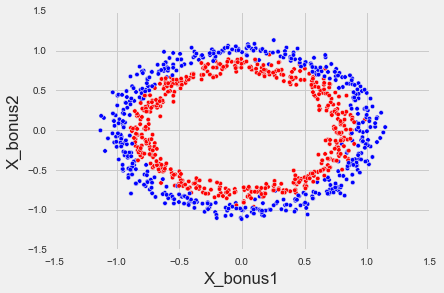

In [50]:
plt.scatter(df.X_bonus1, df.X_bonus2, c=df.y_bonus.map(colors))
plt.xlabel("X_bonus1")
plt.ylabel("X_bonus2")
plt.show()

### X_otherbonus1 vs X_otherbonus2

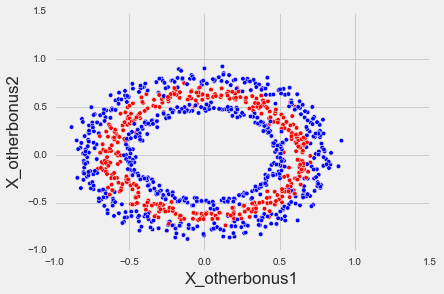

In [51]:
plt.scatter(df.X_otherbonus1, df.X_otherbonus2, c=df.y_otherbonus.map(colors))
plt.xlabel("X_otherbonus1")
plt.ylabel("X_otherbonus2")
plt.show()

## Naive Bayes

You know what I hate about Fall?  I hate how early all the Christmas music comes out.  Why does it feel like it comes out earlier and earlier every year?  Let's make a classifier that can distinguish between lines of Christmas music lyrics, and the only thing I'm allowed to listen to these days: children's music lyrics.

We'll try to perform this classification with a new type of classifier, Naive Bayes.  In the Naive Bayes classifier, the goal is the same, but the process is completely different.  Why might you care about this?  The reason is the __assumptions__ of the model.  For example, the assumptions of linear regression are:

* Linear relationship: Hopefully this one is obvious.  The predictors should be linearly related to the response (perhaps after feature engineering)
* Multivariate normality: the predictors are taken from a multivariate normal distribution (often not true, but not a huge issue)
* No or little multicollinearity: essentially, a generalization of what it would mean for a non-square matrix to have a non-zero determinant.  This is not a good explanation, and it isn't quite true, but this is also a bit of a technicality that we shouldn't concern ourselves with.
* No auto-correlation in the errors: We've discussed this one!
* Homoscedasticity: If you happen to have different response variables (we never have), then they have the same variance.

<div style="color:red"> To start, do some searching around online to see if you can determine what the assumptions of Logistic Regression and Naive Bayes are. Why might Naive Bayes be a good choice for analyzing lines of song lyrics?</div>

<div style="color:blue">The Naive Bayes classifier assumes that the attributes are not correlated with one another at all. In logistic regression, the dependent variable must be binary, error terms must be independent, and the model should be fitted correctly. The difference between the two is that logistic regression weights each feature together (some have stronger weights and some have weaker weights) and Naive Bayes assumes that all the features are strongly correlated. In this case, because the words of the lyrics in non-christmas lyrics are not closely correlated to the words in the christmas lyrics, Naive Bayes is a good choice for analyzing these lines of song lyrics</div>

#### What is Naive Bayes?

Before we answer that, we need to establish some terminology: in this setting, a __document__ is a single line of lyrics, and the __corpus__ is the total collection of all lyrics.

Based on the assumptions you determined above, there is a somewhat-standard-but-too-much-probability-for-me-today derivation of the Naive Bayes algorithm.  What you arrive at is the very believable equation:

$$p\left(C_k \mid x_1, \ldots, x_n\right) = \frac{1}{Z}\ p\left(C_k\right)\prod_{i=1}^n p\left(x_i \mid C_k\right)$$

("Doesn't look very believable to me," you could rightly say.) This is far easier to understand than it looks.  What are all the pieces of this equation?

* $p\left(C_k \mid x_1, \ldots, x_n\right)$ is the __conditional probability__ of the vector $\overline{v} = \left<x_1, \ldots, x_n\right>$ being in class $C_k$.  More simply, it's the chance that the document you're currently looking at is in the class you're currently considering it to be in.  You compute this probability for all the classes, and then just choose the largest-probability class for $\overline{v}$.
* $\frac{1}{Z}$ is a scaling factor used to make everything add up to 1, because probabilities always have to add to one.  Since it doesn't depend on the class, it's of no interest to us. (If you had to pick the bigger of two things: $y = 2x$ and $z = 3x$, for some positive number x, you don't care what $x$ is, you know $z$ is automatically the winner. So you can just ignore the $x$.)
* $p\left(C_k\right)$ is the __prior probability__ of class $C_k$.  This is a way fancier name than it needs to be: it's the fraction of total documents that are in class $C_k$.
* $\prod_{i=1}^n$ is the __product__ symbol.  Just like $\sum_{i=1}^n$ is the sum symbol.  It just means "multiple up all the following:".
* $p\left(x_i \mid C_k\right)$ is the __likelihood__ of $x_i$ being in class $C_k$.  Again, it's just a fraction: it's the fraction of those documents in class $C_k$ which actually contain $x_i$.  If there are 5 tweets that are classified as "hangry", and 2 of them contain the word "eat", then the likelihood $p\left(\text{"eat"} \mid \text{"hangry"}\right) = \frac{2}{5}$. It doesn't matter for this calculation that there were also 3 occurances of "eat" that were classified as "not hangry", or that the "not hangry" class had 25 tweets it in.

So, putting this all together, you need to calculate all the $p\left(C_k\right)$ terms for each class, and the $\prod_{i=1}^n p\left(x_i \mid C_k\right)$ terms for each (document, class) pair, and then given any document, you classify a document (for training or for new, test data) by computing all the conditional probabilities for each class and picking the class with the highest probability.  

#### Okay, so: your turn.  
<div style="color:red"> Make a Naive Bayes classifier on your dataset of "lines from songs", classifying them as children's music or Christmas music.</div>

The datasets should be taken from `christmas_music.txt` and `non_christmas_music.txt` on Canvas.

Here's a potentially incomplete list of tasks to do:
* read in the text files,
* clean them up appropriately (for example in song lyrics, some words have shortenings like `e'erywhere` or `singin'` that you should probably expand before stemming),
* vectorize/stem the words, remove stopwords,
* (you may need to build a special stopword list over time: filter out your current list of stop words, view the words that are in a ton of documents, add those your list of stop words, filter again, etc.)
* create a bunch of counts of the "total collection of documents", "total collection of documents in class 1 (Christmas)", "total collection of documents in class 0 (Children's)",
* create two global variables: the first is `CORPUS_SIZE`, its the number of words to include from your _corpus_, or body of documents.  The second is below: `BIGRAM_MULTIPLIER`.
* <span style="color:red"> Once you successfully do create the model, do the same thing again inluding the top `BIGRAM_MULTIPLIER * CORPUS_SIZE` bigrams in your corpus.  Bigrams are pairs of words in succession.</span>

#### Note: this may look disturbingly similar to what we're going to do on the tweet dataset!  That's the point!  This is practice for that, and a lot of the code you right should carry over just fine.

#### Note 2: A lot of the above can be done using `nltk`.  Use it! This lab would be way too long without using that library.

In [52]:
global CORPUS_SIZE
global BIGRAM_MULTIPLIER
CORPUS_SIZE = 1000   # use 1000 words from the corpus

### Load the dataset

In [53]:
classification = []
all_lyrics = []
stop_words = []

f1 = open('non_christmas_music.txt')
for line in f1:
    if line != '\n':
        all_lyrics.append(line)
        classification.append(0)

In [54]:
f2 = open('christmas_music.txt', encoding="utf8")
for line in f2:
    if line != '\n':
        all_lyrics.append(line)
        classification.append(1)

### Generate a dataframe that contains all the lines of all the songs and the classification (0 for non-christmas and 1 for christmas)

In [55]:
df = pd.DataFrame({'Classification': classification, 'Lines': all_lyrics})
df.head()

,Classification,Lines
0,0,"The ants go marching one by one, hurrah, hurrah\n"
1,0,"The ants go marching one by one, hurrah, hurrah\n"
2,0,"The ants go marching one by one,\n"
3,0,The little one stops to suck his thumb\n
4,0,And they all go marching down to the ground\n


In [56]:
from string import punctuation
def remove_punctuation(s):
    w = ''.join(c for c in s if c not in punctuation)
    return w

In [57]:
def all_char(word):
    for letter in word:
        if not letter.isalnum():
            return False
    return True

### Stemming all the song lyrics
1. I create a function to stem a line of text
2. I remove punctuation from all the lyrics and then stem every line of lyrics

In [58]:
stemmer = PorterStemmer()
def stem_a_line(line,stemmed_words=None, stop_words=None):  
    words = re.split("\s", line)
    words = [word for word in words if len(word) > 0 and all_char(word) ]
    stemmed_line = []
    for word in words:
        temp = word.replace("\n", "").lower()
        w = stemmer.stem(temp)
        if w not in stopwords.words('english'):
            stemmed_line.append(w)
            if stemmed_words != None:                                    
                if w not in stemmed_words: stemmed_words.append(w)        
        else:
             if stemmed_words != None:                                     
                    if w not in stop_words: stop_words.append(w) 
   
    if stemmed_words != None:  
        return(stemmed_words, stop_words, stemmed_line)
    else:
        return stemmed_line

In [59]:
#Remove punctuation
for i in range(len(all_lyrics)):
    all_lyrics[i] = remove_punctuation(all_lyrics[i])

stemmed_words = []     
stop_words = []       
stemmed_lyrics =[]
#Stem the lyrics
for line in all_lyrics:
    stemmed_words, stop_words, stemmed_line = stem_a_line(line,stemmed_words, stop_words)
    stemmed_lyrics.append(stemmed_line)

### Here, I vectorize this large dataset by using the top CORPUS_SIZE=1000 words and add a column to the dataframe with each vectorized line

In [69]:
common_words = [w[0] for w in Counter(stemmed_words).most_common(CORPUS_SIZE)]
print(common_words[0:10])
v = []
for i_lyric in stemmed_lyrics:
    a = []
    for i in range(CORPUS_SIZE):
        if common_words[i] in i_lyric:
            a.append(1)
        else:
            a.append(0)
    v.append(a)

df['Vectorized'] = v
df.head()

['fishi', 'camel', 'bought', 'hap', 'gum', 'hiho', 'virgin', 'afford', 'christmas', 'set']


,Classification,Lines,Vectorized
0,0,"The ants go marching one by one, hurrah, hurrah\n","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"The ants go marching one by one, hurrah, hurrah\n","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,"The ants go marching one by one,\n","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,The little one stops to suck his thumb\n,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,And they all go marching down to the ground\n,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Here I calculate the probabilities of having each word in non-christmas and the probabilities of having each word in christmas. These vectors of probabilities are prob_c and prob_nc

In [70]:
# count total Christmas and non-Christmas
den_christmas = 0                     
den_nonchristmas = 0                 
for v in df['Classification']:
    if v == 0:
        den_nonchristmas += 1
    else:
        den_christmas += 1

# Probability of a word in c and nc classes
N_lyrics = len(df["Classification"])
prob_c = {}        
prob_nc = {}
vect_nc= []        
vect_c = []

for i in range(N_lyrics):
    if df["Classification"][i] == 0:
        vect_nc.append(df["Vectorized"][i])
    else:
        vect_c.append(df["Vectorized"][i])
             
for iwrd in range(CORPUS_SIZE):
    num_nc = sum([n[iwrd] for n in vect_nc])
    num_c  = sum([n[iwrd] for n in vect_c])
    prob_nc[common_words[iwrd]] = float(num_nc)/den_nonchristmas     
    prob_c[common_words[iwrd]] = float(num_c)/den_christmas         

### Using the Naive Bayes equation
I multiplied the non-christmas probability vector by probability of non-christmas out of all the lyrics, and I multiplied the christmas probability vector by the probability of christmas out of all the lyrics

I defined a function "classify" that takes a stemmed_line of lyrics and checks for the probabilities of each word in non-christmas and in christmas. To find the final probability of the lyric being a christmas or non-christmas lyric, I multiplied the probabilities of each word together. The function returns 0 for non-christmas and 1 for christmas, depending on which probability is greater along with the two probabilities them selves

In [74]:
def nb_classify(stemmed_line,pC, pNC, prob_c,prob_nc):
    prob_christmas = pC 
    prob_nonchristmas = pNC
    
    for w in sorted(set(stemmed_line)):    #Avoid using same word twice
        if w in common_words:
            prob_christmas *= prob_c[w]    
            prob_nonchristmas  *= prob_nc[w]
         
    if prob_nonchristmas > prob_christmas:
        result = 0
    else:
        result = 1
        
     
    return result, prob_christmas/(prob_christmas+prob_nonchristmas), prob_nonchristmas/(prob_christmas+prob_nonchristmas)

pC = float(den_christmas)/(den_christmas + den_nonchristmas)
pNC = 1-pC
print ('pC = %.2f%% ' % (pC*100))
print('pNC = %.2f%%'% (pNC*100)) 


pC = 40.09% 
pNC = 59.91%


Now I define a test function that can be used to test a lyric

In [76]:
def classify_a_lyric(lyric):
    stemmed_line = stem_a_line(lyric)
    result, p1, p2 = nb_classify(stem_a_line(lyric),pC, pNC, prob_c,prob_nc)
    print('Lyric           = '+lyric)
    print('classification  = '+str(result))
    print('p_christmas     = %-6.2f%%' % (p1*100))
    print('p_non-christmas = %-6.2f%%' % (p2*100))
    
lyric = all_lyrics[150].rstrip()
classify_a_lyric(lyric)

Lyric           = Went out one day
classification  = 0
p_christmas     = 4.76  %
p_non-christmas = 95.24 %


### Test on all the lyrics to see how good are the predictions
The results are not terrible, I get 1785 out of 1938 correct with an accuracy of 91.9%

In [82]:
corrected = 0
all_results = []
classifications = []
correct = []
for ilyric in range(N_lyrics):
    stemmed_line = stemmed_lyrics[ilyric]
    result, p1, p2 = nb_classify(stemmed_line,pC, pNC, prob_c,prob_nc)
    if result == classification[ilyric]: 
        corrected += 1
        isgood = "correct"
    else:
        isgood = "incorrect"
    all_results.append(result)
    classifications.append(classification[ilyric])
    correct.append(isgood) 
results = pd.DataFrame({'results': all_results, 'classification': classifications, 'correct': correct})
print('correct prediction: '+ str(corrected) + " out of " + str(N_lyrics))
acc = float(corrected)/N_lyrics*100
print("accuracy: " + str(acc) + "%")
results.head()

correct prediction: 1781 out of 1938
accuracy: 91.89886480908153%


,classification,correct,results
0,0,correct,0
1,0,correct,0
2,0,correct,0
3,0,correct,0
4,0,correct,0


# Now let us use BIGRAM_MULTIPLIER
I will try  BIGRAM_MULTIPLIER=2. 

### Instead of using single stemmed word, xi, as a predictor, form new combinations of words by combining single words together as 'x1_x2' using the order in common_words 

In [92]:
BIGRAM_MULTIPLIER = 2
bigram_lyrics = [] 
for ilyric in range(N_lyrics):
    bigram = u''  
    i_bigram = 0
    stemmed_line = stemmed_lyrics[ilyric]
    for iwd in range(CORPUS_SIZE):
        if common_words[iwd] in stemmed_line: 
            bigram += "_"+common_words[iwd]
            i_bigram += 1
            if i_bigram>BIGRAM_MULTIPLIER: 
                break
    if i_bigram > 1: 
        stemmed_line.append(bigram)
        if bigram not in common_words: common_words.append(bigram)    
    bigram_lyrics.append(stemmed_line)    
print(' the corpus size inscreased to len(common_words)=',len(common_words))
print('common_words[-10:]=',common_words[-10:])

 the corpus size inscreased to len(common_words)= 1858
common_words[-10:]= ['_hurri_tonight', '_watch_better', '_cri_better', '_im_whi_tell', '_list_make', '_check_twice', '_find_gonna_nice', '_awak_know', '_youv_know_good', '_sake_good']


### I'm basically repeating exactly the same steps. First is to vectorize

In [94]:
v = []
for i_lyric in bigram_lyrics:
    a = []
    for i in range(len(common_words)):
        if common_words[i] in i_lyric:
            a.append(1)
        else:
            a.append(0)
    v.append(a)
    
df['Vectorized'] = v
df.head()
vect_nc= []        
vect_c = []
for i in range(N_lyrics):
    if df["Classification"][i] == 0:
        vect_nc.append(df["Vectorized"][i])
    else:
        vect_c.append(df["Vectorized"][i])

### Calculate the probabilities in the classes

In [96]:
prob_c = {}      
prob_nc = {}   
for iwrd in range(len(common_words)):
    num_nc = sum([n[iwrd] for n in vect_nc])
    num_c  = sum([n[iwrd] for n in vect_c])
    prob_nc[common_words[iwrd]] = float(num_nc)/den_nonchristmas    
    prob_c[common_words[iwrd]] = float(num_c)/den_christmas           

### Bigram improves accuracy to 94.58%.

In [97]:
corrected = 0
all_results = []
classifications = []
correct = []
for ilyric in range(N_lyrics):
    bigram__line = bigram_lyrics[ilyric]
    result, p1, p2 = nb_classify(bigram__line,pC, pNC, prob_c,prob_nc)
    if result == classification[ilyric]: 
        corrected += 1
        isgood = "correct"
    else:
        isgood = "incorrect"
    all_results.append(result)
    classifications.append(classification[ilyric])
    correct.append(isgood) 
results = pd.DataFrame({'results': all_results, 'classification': classifications, 'correct': correct})
print('correct prediction: '+ str(corrected) + " out of " + str(N_lyrics))
acc = float(corrected)/N_lyrics*100
print("accuracy: " + str(acc) + "%")
results.head()

correct prediction: 1833 out of 1938
accuracy: 94.58204334365325%


,classification,correct,results
0,0,correct,0
1,0,correct,0
2,0,correct,0
3,0,correct,0
4,0,correct,0
